## Mobile Apps Success prediction , based on their feautres



## Project abstract 

## Libraries

In [2]:
# basics
import numpy as np
import pandas as pd 

# for plots
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error

### Dataset load

In [3]:
df = pd.read_csv("DataSet/googleplaystore.csv")
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

### Data exploration


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
sns.set_style('darkgrid')

PALETTE = "Set3"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [8]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


## Disctributions 

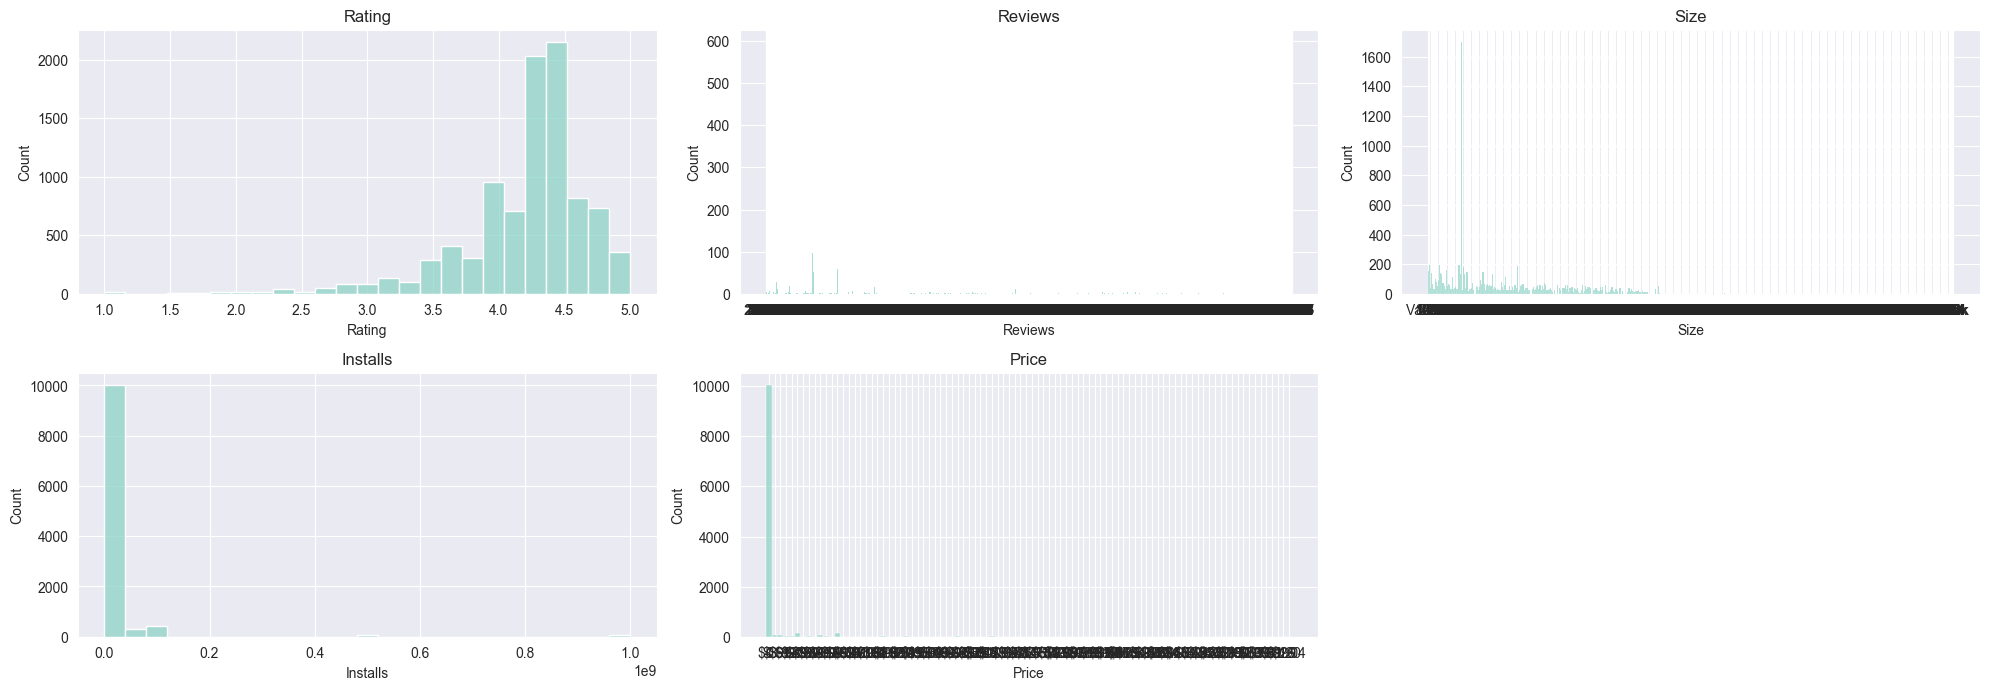

In [34]:

# Drop non-numeric or irrelevant columns for distribution
columns = df.drop(columns=['App', 'Category', 'Type', 'Genres', 'Last Updated',
                           'Content Rating', 'Current Ver', 'Android Ver']).columns

# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(columns):
    sns.histplot(data=df, 
                 x=column,
                 bins=25,
                 ax=axes[i],
                 kde=False
                 )
    axes[i].set_title(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

# Remove any extra axes if fewer than 9 columns
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


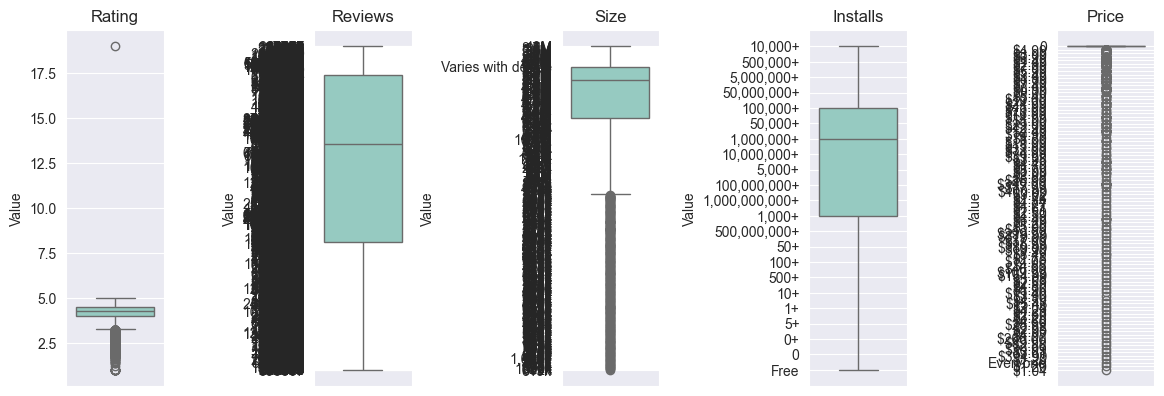

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))

axes = axes.flatten()
for i, column in enumerate(columns):
    sns.boxplot(data=df, 
                y=column, 
                ax=axes[i],
                showfliers = True
                )
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Value")

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0, w_pad=0.7, h_pad=0.9)
plt.show()

### Data cleaning

In [27]:


# Make a copy to avoid modifying the original
df_clean = df.copy()

# 1. Clean "Reviews" (convert to int)
df_clean["Reviews"] = pd.to_numeric(df_clean["Reviews"], errors="coerce")

# 2. Clean "Installs" (remove commas and plus, convert to int)
df_clean["Installs"] = df_clean["Installs"].str.replace("[+,]", "", regex=True)
df_clean["Installs"] = pd.to_numeric(df_clean["Installs"], errors="coerce")

# 3. Clean "Price" (remove "$", convert to float)
df_clean["Price"] = df_clean["Price"].str.replace("$", "", regex=False)
df_clean["Price"] = pd.to_numeric(df_clean["Price"], errors="coerce")

# 4. Clean "Size" column
def convert_size(size_str):
    if pd.isna(size_str) or size_str == "Varies with device":
        return np.nan
    size_str = size_str.strip().upper()
    if "M" in size_str:
        return float(size_str.replace("M", "")) * 1_000_000
    elif "K" in size_str:
        return float(size_str.replace("K", "")) * 1_000
    else:
        return np.nan

df_clean["Size"] = df_clean["Size"].apply(convert_size)

# 5. Convert "Last Updated" to datetime
df_clean["Last Updated"] = pd.to_datetime(df_clean["Last Updated"], errors="coerce")

# 6. Convert appropriate columns to categories (for grouping/plotting)
category_cols = ["App", "Category", "Type", "Content Rating", "Genres", "Current Ver", "Android Ver"]
for col in category_cols:
    df_clean[col] = df_clean[col].astype("category")

# 7. Drop rows with critical missing values (optional: tweak as needed)
df_clean.dropna(subset=["Rating", "Reviews", "Installs", "Price", "Size"], inplace=True)


In [28]:
print(df_clean.dtypes)


App                     category
Category                category
Rating                   float64
Reviews                  float64
Size                     float64
Installs                 float64
Type                    category
Price                    float64
Content Rating          category
Genres                  category
Last Updated      datetime64[ns]
Current Ver             category
Android Ver             category
dtype: object


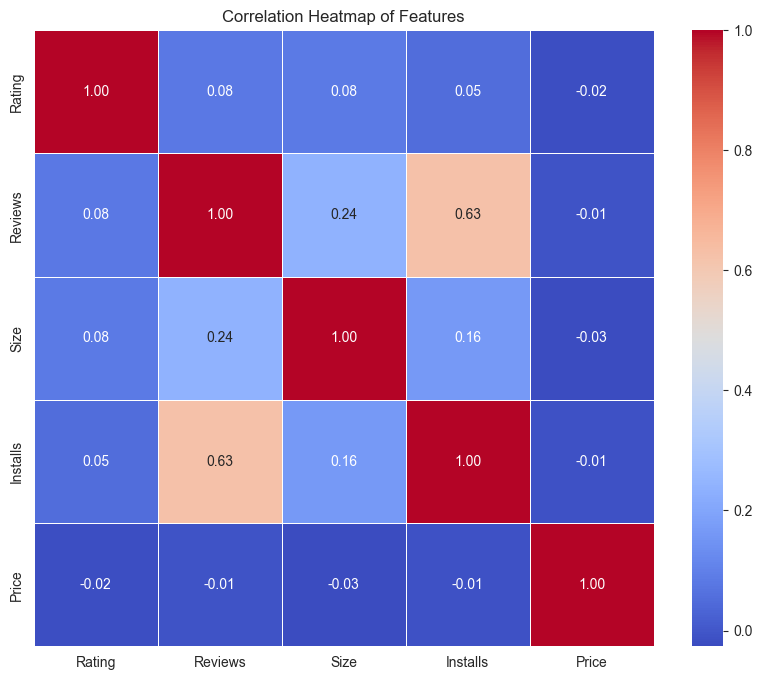

In [30]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title for the heatmap
plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()

/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_4804/1026307269.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=install_counts.index, y=install_counts.values, palette='Set2')


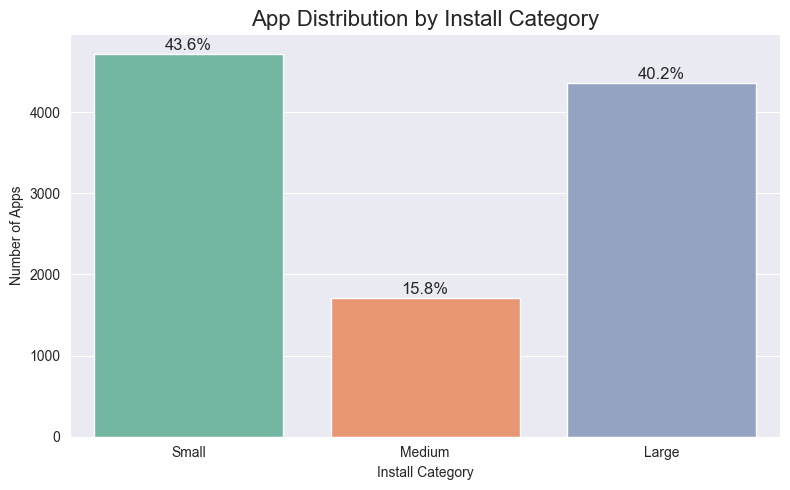

In [37]:
## installs columsn processinf and analyses
# Clean 'Installs' column (remove '+' and ',' and convert to int)
# Ensure all values are strings before replacing
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(int)

# Define bins and labels
bins = [0, 100000, 1000000, df['Installs'].max()]
labels = ['Small', 'Medium', 'Large']

# Create a new column with categories
df['Install_Category'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)

install_counts = df['Install_Category'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=install_counts.index, y=install_counts.values, palette='Set2')

# Add labels
ax.set_title('App Distribution by Install Category', fontsize=16)
ax.set_xlabel('Install Category')
ax.set_ylabel('Number of Apps')

# Annotate bars with percentage
for i, count in enumerate(install_counts.values):
    percentage = f"{100 * count / df.shape[0]:.1f}%"
    ax.text(i, count + 50, percentage, ha='center', fontsize=12)

plt.tight_layout()
plt.show()


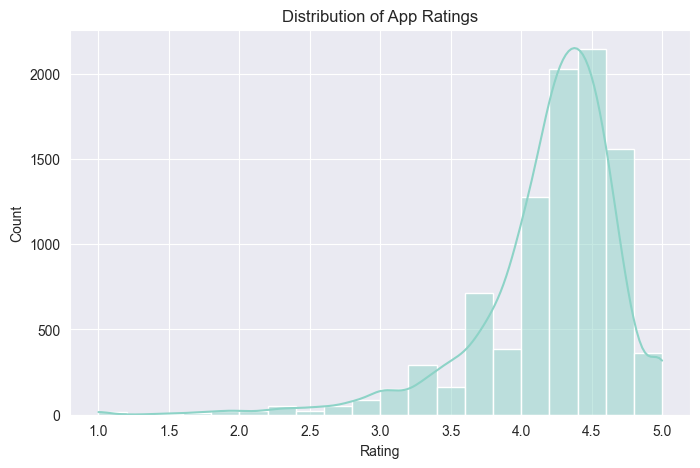

In [42]:
# Example: Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


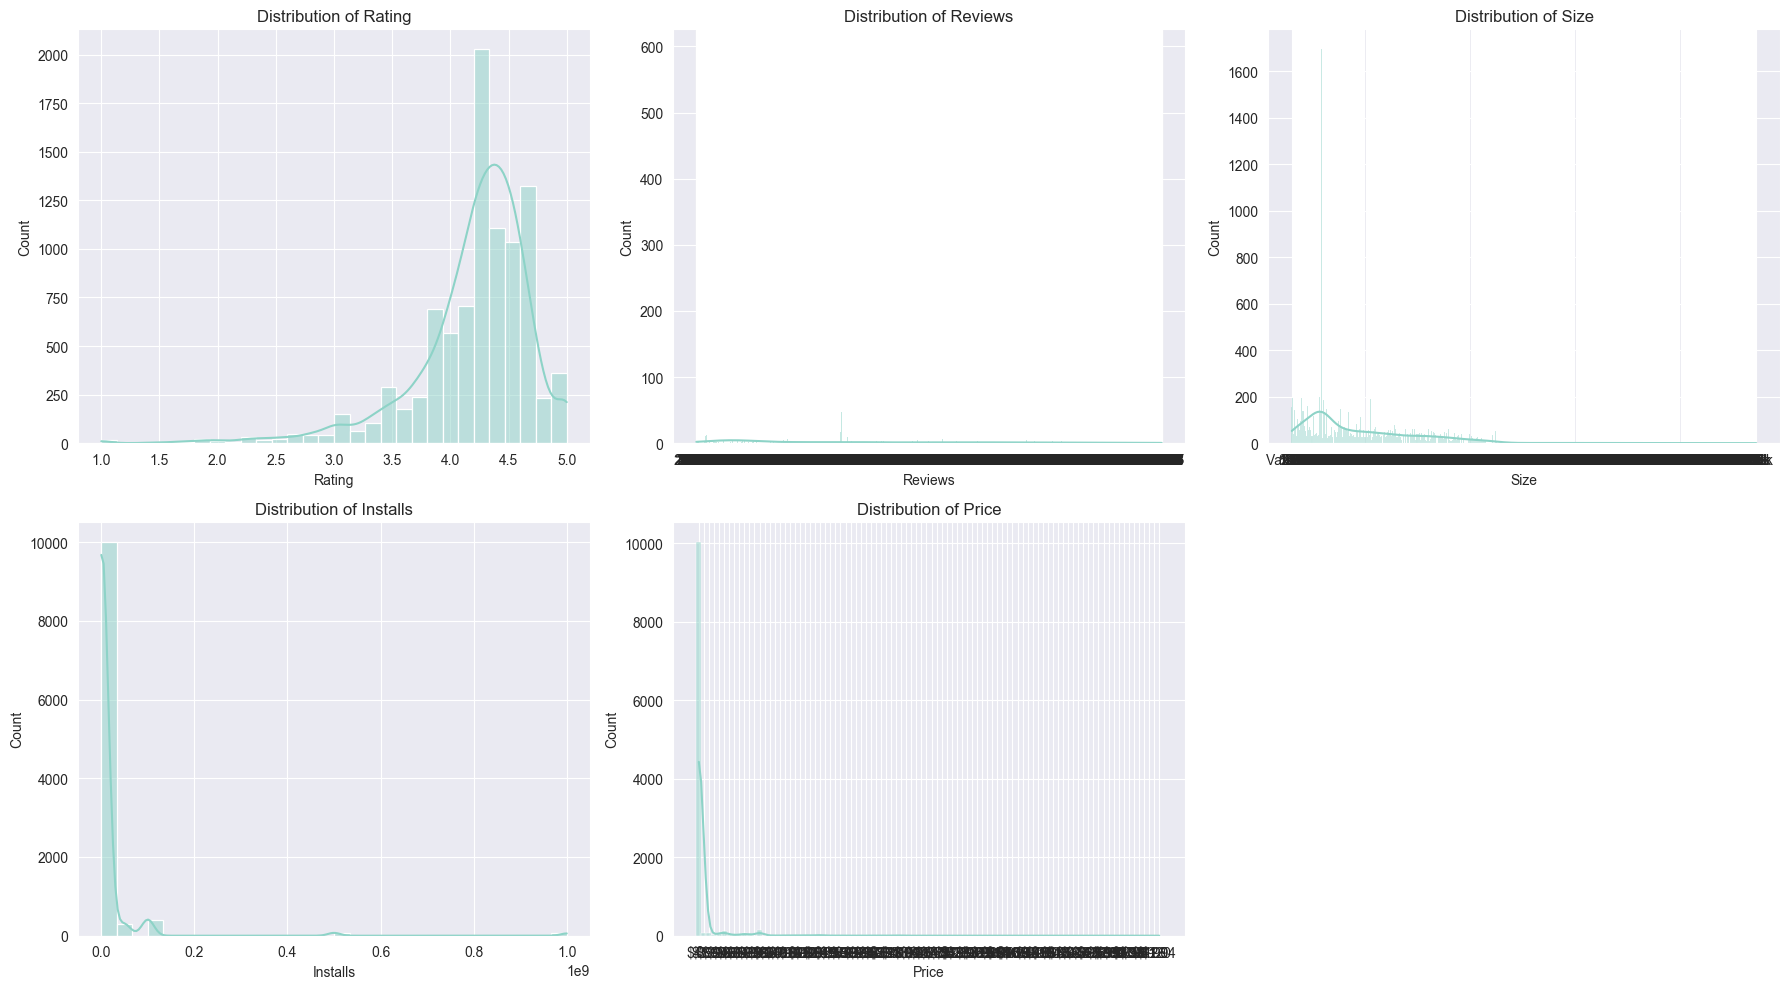

In [44]:
# Features to analyze
features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

# Create histograms for each feature
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Hide empty subplot if needed
if len(features) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_4804/3308762218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='mako')


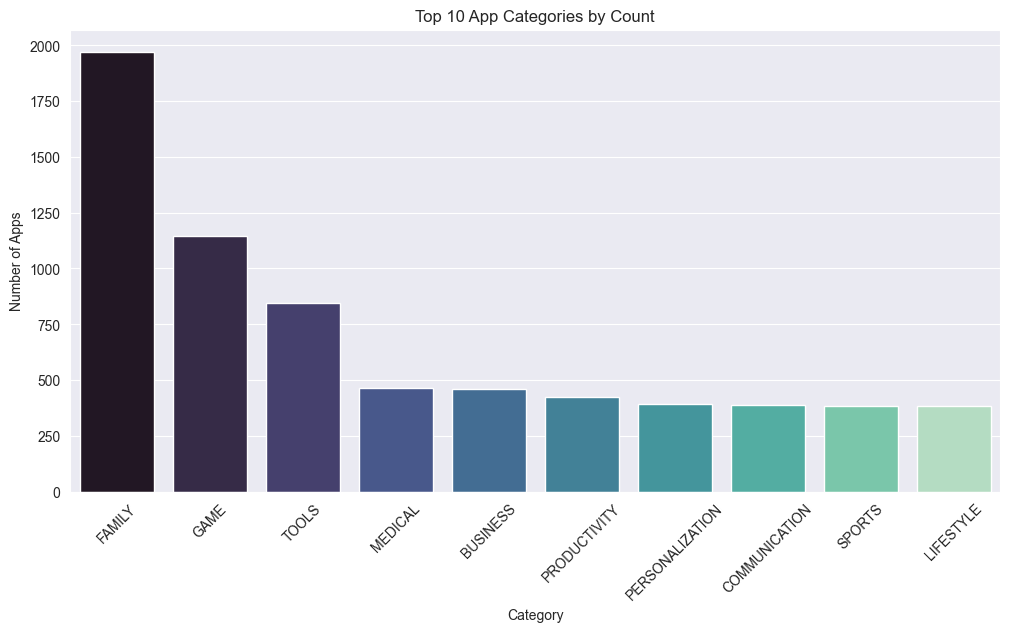

In [45]:
plt.figure(figsize=(12, 6))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='mako')
plt.xticks(rotation=45)
plt.title('Top 10 App Categories by Count')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.show()


/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_4804/2057520609.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Range', y='Rating', data=filtered_df, palette='Set3')


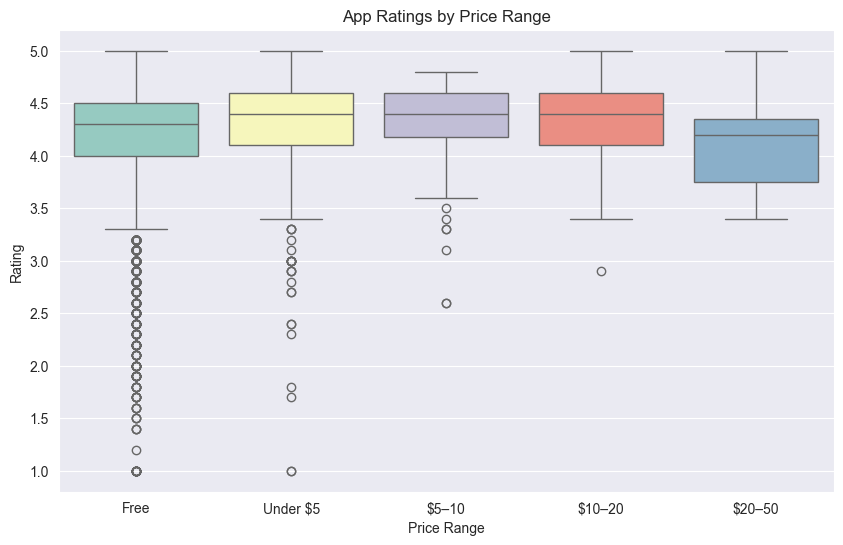

In [51]:
# Filter prices under $50 again
filtered_df = df_clean[df_clean['Price'] < 50].copy()

# Bin prices
bins = [0, 1, 5, 10, 20, 50]
labels = ['Free', 'Under $5', '$5–10', '$10–20', '$20–50']
filtered_df['Price_Range'] = pd.cut(filtered_df['Price'], bins=bins, labels=labels, right=False)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Range', y='Rating', data=filtered_df, palette='Set3')
plt.title('App Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()


# Feature Engineering 


In [53]:
# Convert 'Last Updated' to datetime if it's not already
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')  # 'coerce' handles invalid parsing

# Now calculate the age of the app (days since last updated)
df['App_Age'] = (pd.to_datetime('today') - df['Last Updated']).dt.days


In [56]:
# Strip whitespaces and remove dollar sign
df['Price'] = df['Price'].str.strip().str.replace('$', '', regex=False)

# Replace 'Free' or other non-numeric with 0
df['Price'] = df['Price'].replace({'Free': '0', 'free': '0'})

# Convert to float (coerce errors just in case)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)
df['Log_Price'] = np.log1p(df['Price'])  # log(Price + 1)


In [57]:
# Remove '+' and ',' then convert to float
df['Installs'] = df['Installs'].astype(str).str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Log_Installs'] = np.log1p(df['Installs'])  # log(Installs + 1)


In [58]:
# Calculate Price per Install (avoid division by zero by filtering out zero installs)
df['Price_Per_Install'] = df['Price'] / df['Installs']
df['Price_Per_Install'] = df['Price_Per_Install'].replace([np.inf, -np.inf], np.nan)  # handle infinite values


In [59]:
# Create a binary feature for good apps based on Rating (rating >= 4)
df['Good_App'] = df['Rating'] >= 4


In [60]:
# Count how many apps exist in each category
category_popularity = df['Category'].value_counts()
df['Category_Popularity'] = df['Category'].map(category_popularity)


In [62]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
def convert_size(size_str):
    if size_str.endswith('M'):
        return float(size_str[:-1]) * 1_000_000
    elif size_str.endswith('k'):
        return float(size_str[:-1]) * 1_000
    elif size_str == 'Varies with device':
        return np.nan
    else:
        return np.nan




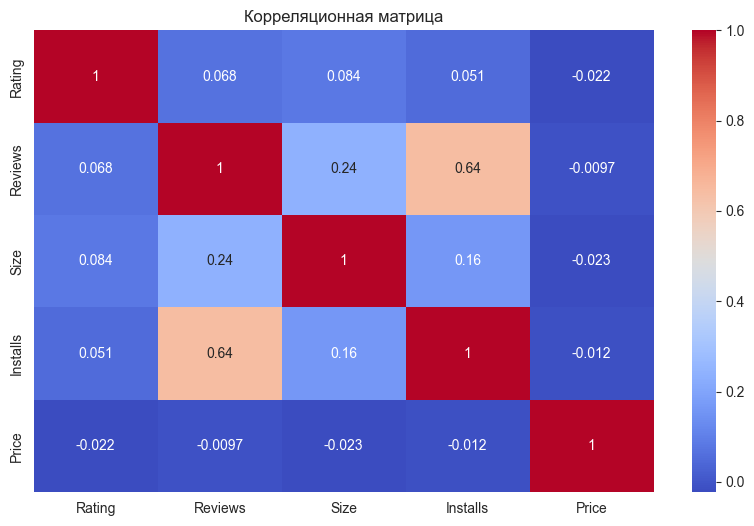

In [65]:
import numpy as np
import pandas as pd

# Преобразуем Reviews в float
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')



# Преобразуем Size
def convert_size(size):
    if size == 'Varies with device' or pd.isna(size):
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', '')) * 1_000_000
    elif 'k' in size:
        return float(size.replace('k', '')) * 1_000
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)

# Теперь можно считать корреляцию
correlation_matrix = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()

# Построение тепловой карты
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()


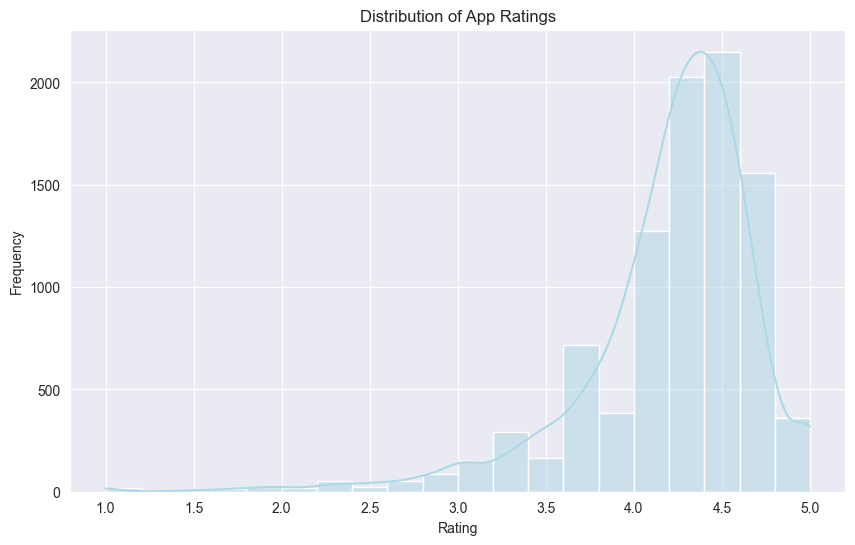

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='lightblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


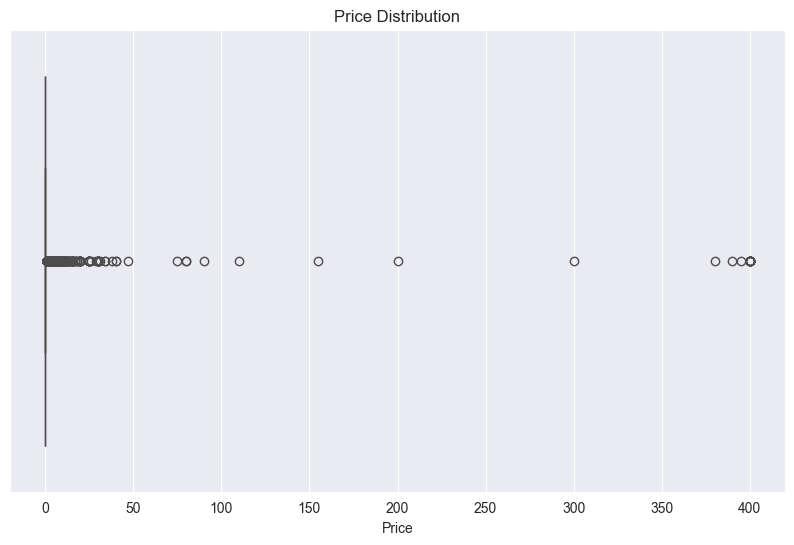

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'], color='orange')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()


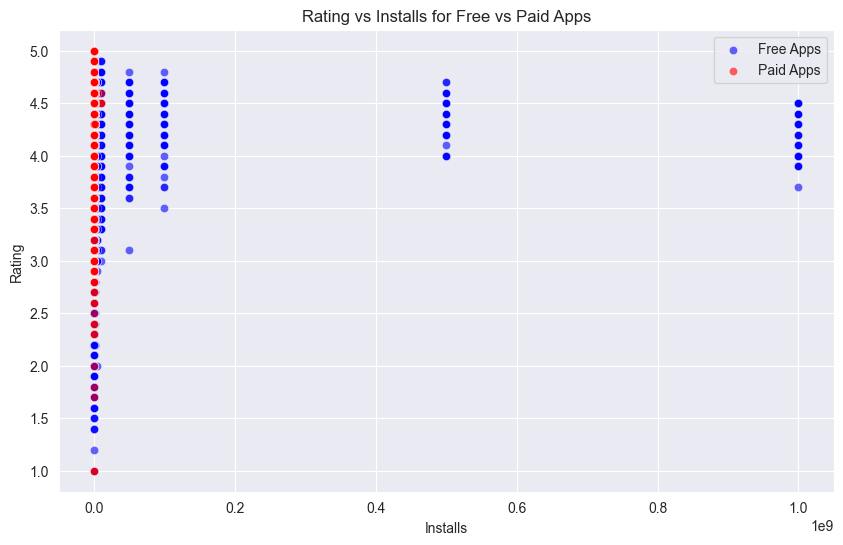

In [68]:
# Separate data for free and paid apps
free_apps = df[df['Price'] == 0]
paid_apps = df[df['Price'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', data=free_apps, label='Free Apps', alpha=0.6, color='blue')
sns.scatterplot(x='Installs', y='Rating', data=paid_apps, label='Paid Apps', alpha=0.6, color='red')
plt.title('Rating vs Installs for Free vs Paid Apps')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.legend()
plt.show()


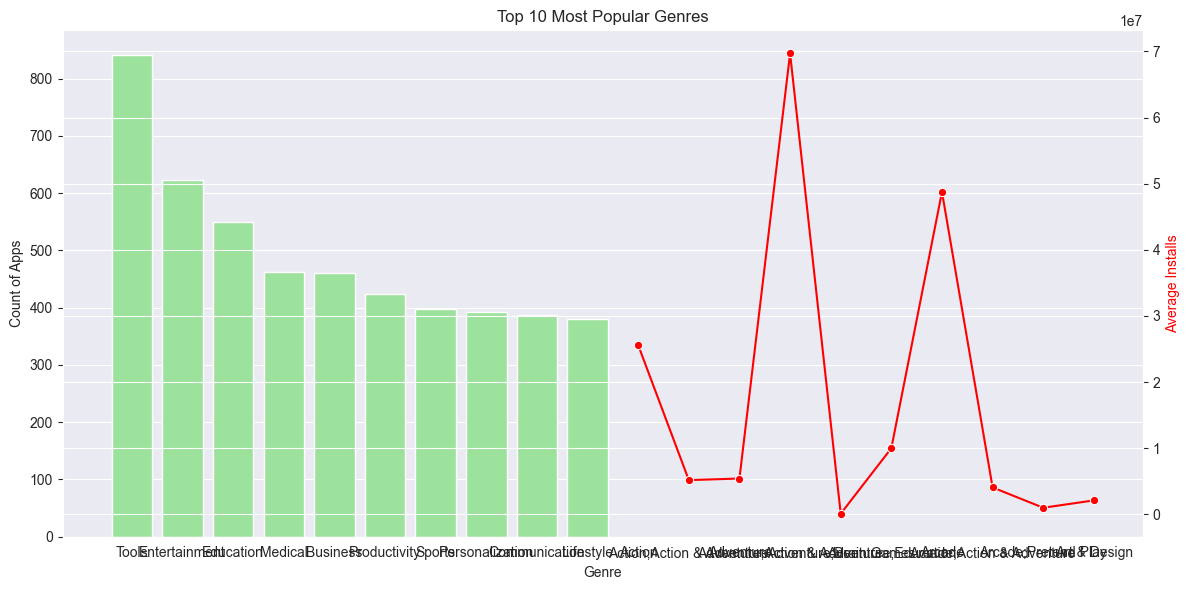

In [69]:
# Count number of apps in each genre
genre_counts = df['Genres'].value_counts()

# Average installs by genre
avg_installs_by_genre = df.groupby('Genres')['Installs'].mean()

# Plot genre popularity (count) and average installs
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], ax=ax1, color='lightgreen')
ax1.set_title('Top 10 Most Popular Genres')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Count of Apps')

ax2 = ax1.twinx()
sns.lineplot(x=avg_installs_by_genre.index[:10], y=avg_installs_by_genre.values[:10], ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Installs', color='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


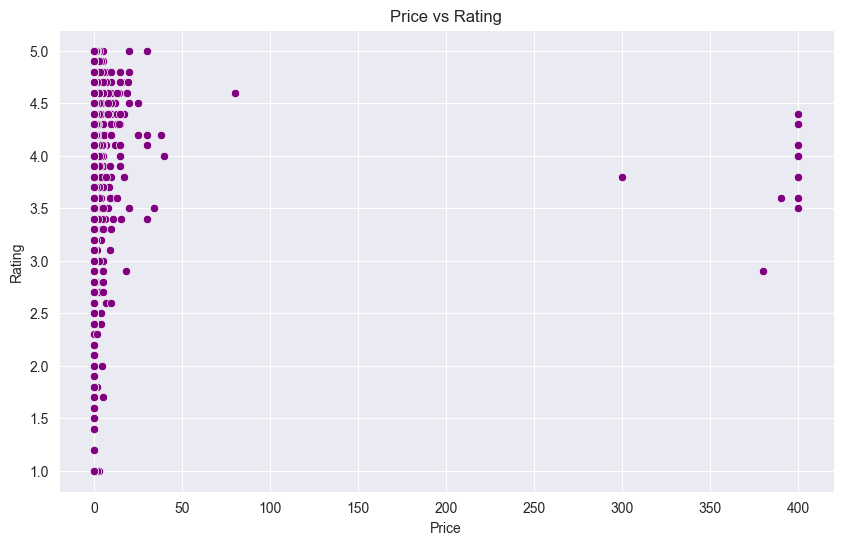

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df, color='purple')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


# Normalization 